In [1]:
# libraries 

import json as j
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle





In [2]:
#load in hotel reviews dataset
df=pd.read_csv('hotel-reviewss.csv')

#view dataset
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
#stem words
stemmer = SnowballStemmer('english')

In [5]:
#stop words removal
words = stopwords.words("english")


In [6]:


#regular expression to clean dataset, replace [a-zA-Z]
#^[a-zA-Z] means any a-z or A-Z at the start of a line. 
#[^a-zA-Z] means any character that IS NOT a-z OR A-Z.
# we also apply the stem and stopwords
#this cleans the dataset
df['cleaned'] =df['Description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())



In [7]:
#split data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['Is_Response'], test_size=0.2)

#NLP Trainer

#using sklearn pipelin3 to define parameters like TfidfVectorizer , LinearSVC(optional)

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k=10000)),
                     ('clf', LinearSVC(C=1.0, penalty='l1', max_iter=3000, dual=False))])


model = pipeline.fit(X_train, y_train)

#paramenters for training
vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['clf']


print("accuracy score: " + str(model.score(X_test, y_test)))

print(model.predict(['that was a good place']))



accuracy score: 0.81
['not happy']


### OR

In [8]:
# using TfidfVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [9]:
 Xx = vectorizer.fit_transform(X_train)

In [10]:
#CHOOSE A CLASIFIER ALGORITHM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

labels_train= y_train

text_classifier = LogisticRegression()

print(text_classifier.fit(Xx, labels_train))

LogisticRegression()


In [11]:

acc=text_classifier.score(Xx, y_train)

print(acc)


0.904881101376721


In [13]:
test_set = ['stupid hotel', "loved it in my garden", 'didnt enjoy it']


new_test = vectorizer.transform(test_set)

text_classifier.predict(new_test)

array(['happy', 'happy', 'happy'], dtype=object)

In [14]:
#before applying nltk
print(df['Description'].iloc[:2].values)

#after applying nltk
print("after applying nltk")
print (df['cleaned'].iloc[:2].values)

["The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing."
 "I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my floo

In [15]:
#To pickle the ml model
import pickle




pickle_out = open("hotelll.pickle","wb")
#use the model trained with the pipeline
pickle.dump(model, pickle_out)
pickle_out.close()

In [17]:
 #using your trained model
pickle_in = open("hotelll.pickle","rb")
modelread = pickle.load(pickle_in)

print(modelread.predict(['Bad hotel']))

['not happy']


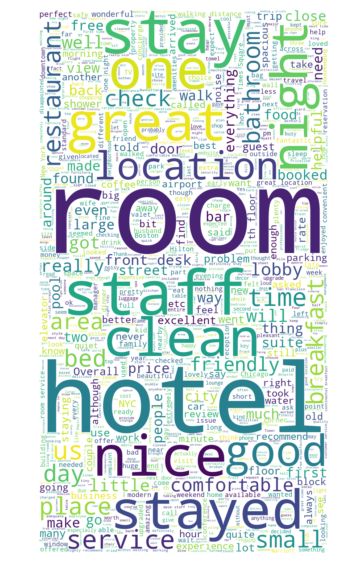

In [20]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
#wordcloud (optional)
words = df['Description']

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 1000, width =800, height = 1500)

words_filtered = words

text = " ".join([ele for ele in words_filtered])


wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()